In [ ]:
import pandas as pd 
import numpy as np
from unidecode import unidecode
import re
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
comparativo = pd.read_csv('qtd_item_visto.csv')
classificacao = pd.read_csv ('classificacao.csv')
#comparativo= comparativo.sort_values(by=['category'])
#classificacao= classificacao.sort_values(by=['category'])

In [ ]:
comparativo.head(3)

,category,Nao visto,Visto,PC nao visto,PC visto
0,3D_GLASSES,7082,7,0.000354,3.500000e-07
1,3D_PRINTERS,5891,850,0.000295,4.250000e-05
2,3D_PRINTER_FILAMENTS,4747,17,0.000237,8.500000e-07


In [ ]:
classificacao.head(3)

,category,f1-score,precision,recall,support
0,3D_GLASSES,0.150000,0.082192,0.857143,7.0
1,3D_PENS,0.000000,0.000000,0.000000,0.0
2,3D_PRINTERS,0.957612,0.972121,0.943529,850.0


In [ ]:
classificacao["precision"].mean()

0.5922906171439261

In [ ]:
merged_inner = pd.merge(left=comparativo, right=classificacao, left_on='category', right_on='category')
merged_inner.head(10)


,category,Nao visto,Visto,PC nao visto,PC visto,f1-score,precision,recall,support
0,3D_GLASSES,7082,7,0.000354,3.500000e-07,0.150000,0.082192,0.857143,7.0
1,3D_PRINTERS,5891,850,0.000295,4.250000e-05,0.957612,0.972121,0.943529,850.0
2,3D_PRINTER_FILAMENTS,4747,17,0.000237,8.500000e-07,0.780488,0.666667,0.941176,17.0
3,ABDOMINAL_TONING_BELTS,2308,1,0.000115,5.000000e-08,0.000000,0.000000,0.000000,1.0
4,ABS_SENSORS,12445,734,0.000622,3.670000e-05,0.946341,0.968616,0.925068,734.0
5,AB_ROLLER_WHEELS,4695,55,0.000235,2.750000e-06,0.836066,0.761194,0.927273,55.0
6,ACCORDIONS,11204,2477,0.000560,1.238500e-04,0.977450,0.992920,0.962455,2477.0
7,ACOUSTIC_GUITARS,17743,689,0.000887,3.445000e-05,0.814337,0.804533,0.824383,689.0
8,ACOUSTIC_PANELS,6753,86,0.000338,4.300000e-06,0.894737,0.817308,0.988372,86.0
9,ACTION_FIGURES,19812,8512,0.000991,4.256000e-04,0.706272,0.754136,0.664121,8512.0


In [ ]:
resultado = merged_inner[['category','Nao visto','Visto','precision']].sort_values(['precision','Visto'])
#resultado['pc'] = resultado['Visto']/resultado['Nao visto']
resultado = resultado.sort_values(['precision','Visto'])
print(resultado.count())
resultado[597:].head(40)

category     1395
Nao visto    1395
Visto        1395
precision    1395
dtype: int64


,category,Nao visto,Visto,precision
195,BRAS,17169,316,0.699769
531,FABRIC_SOFTENERS,4921,93,0.702128
596,GARDEN_SHEDS,4798,20,0.703704
547,FISHING_LURES,18719,2207,0.703748
504,ENGINE_GASKET_SETS,16678,291,0.704663
852,MIRROR_BALLS,3458,139,0.705128
1335,VIDEO_GAME_PREPAID_CARDS,17314,774,0.705805
1393,YOGA_MATS,5247,36,0.711111
1127,SIM_CARDS,6589,118,0.713376
1158,SPICES,12750,224,0.713675


In [ ]:
resultado.head(40)

,category,Nao visto,Visto,precision
3,ABDOMINAL_TONING_BELTS,2308,1,0.000000
1050,QUEUE_STANCHIONS,252,1,0.000000
1228,TACTICAL_BAGS_AND_BACKPACKS,14113,1,0.000000
1256,TOILET_BRUSHES,3477,3,0.000000
701,INDUSTRIAL_SAWS,5484,4,0.000000
1230,TALCUMS,4062,4,0.000000
1040,PROJECTOR_LAMPS,16186,5,0.000000
70,AUTOMOTIVE_ENGINE_VALVE_COVERS,8836,7,0.000000
1219,TABLEWARE_SETS,16572,7,0.000000
1232,TAROT_CARDS,4622,10,0.000000


In [ ]:
resultado = merged_inner[['category','Nao visto','Visto','precision']]
#resultado['pc'] = resultado['Visto']/resultado['Nao visto']
resultado =resultado.sort_values(['precision','Visto'], ascending=False)
resultado[15:].head(40)

,category,Nao visto,Visto,precision
605,GAZEBOS,10154,1268,0.998279
83,AUTOMOTIVE_SHIFT_LEVER_KNOBS,10432,4689,0.998278
876,MOTORCYCLE_HELMETS,17266,7361,0.998179
415,DISHWASHERS,7891,1915,0.997835
578,FOOTBALL_SHOES,17102,7037,0.997564
1056,RAM_MEMORY_MODULES,17826,7771,0.997239
1279,TRAILER_HITCHES,5611,920,0.996689
261,CAR_SEAT_COVERS,20340,5312,0.996666
683,HOVERBOARDS,13815,3107,0.996631
1154,SPARK_PLUGS,19836,7114,0.996619


Text(0, 0.5, 'precision')

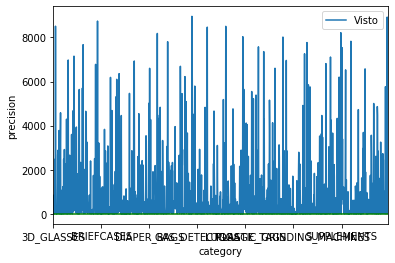

In [ ]:
merged_inner.plot(x='category',y='Visto', stacked=True, kind="line")
#ax = result['PC visto'][:30].plot(secondary_y=True, color='k')
#ax.set_ylabel('PC visto')
ax2 = result['precision'].plot( color='g',kind="line")
ax2.set_ylabel('precision')


In [ ]:
#normalizando
from sklearn import preprocessing

x = resultado[['Nao visto', 'Visto','precision']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resultadoNormalizado = pd.DataFrame(x_scaled)
resultadoNormalizado=resultadoNormalizado.rename(columns={0:'Não revisado',1: 'Revisado',2:'Precisão'})
resultadoNormalizado.head()
resultadoNormalizado['Categoria']=resultado['category']

In [ ]:
resultadoNormalizado.head(40)

,Não revisado,Revisado,Precisão,Categoria
0,0.112700,0.036839,1.000000,3D_GLASSES
1,0.045219,0.012503,1.000000,3D_PRINTERS
2,0.053014,0.008484,1.000000,3D_PRINTER_FILAMENTS
3,0.032337,0.004912,1.000000,ABDOMINAL_TONING_BELTS
4,0.008357,0.004465,1.000000,ABS_SENSORS
5,0.034616,0.004465,1.000000,AB_ROLLER_WHEELS
6,0.013576,0.001563,1.000000,ACCORDIONS
7,0.002775,0.000781,1.000000,ACOUSTIC_GUITARS
8,0.056284,0.000223,1.000000,ACOUSTIC_PANELS
9,0.054798,0.000223,1.000000,ACTION_FIGURES


Text(0, 0.5, 'Precisão')

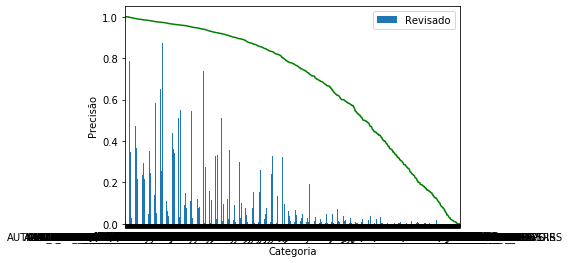

In [ ]:
resultadoNormalizado.plot(x='Categoria',y='Revisado', stacked=True, kind="bar")
#ax = result['PC visto'][:30].plot(secondary_y=True, color='k')
#ax.set_ylabel('PC visto')
ax2 = resultadoNormalizado['Precisão'].plot( color='g',kind="line")
ax2.set_ylabel('Precisão')

Text(0, 0.5, 'Precisão')

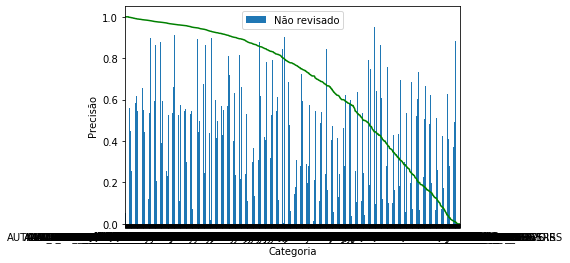

In [ ]:
resultadoNormalizado.plot(x='Categoria',y='Não revisado', stacked=True, kind="bar")
#ax = result['PC visto'][:30].plot(secondary_y=True, color='k')
#ax.set_ylabel('PC visto')
ax2 = resultadoNormalizado['Precisão'].plot( color='g',kind="line")
ax2.set_ylabel('Precisão')

Text(0, 0.5, 'Revisado')

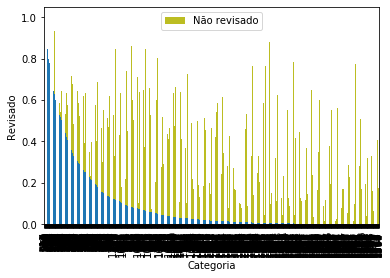

In [ ]:
resultadoNormalizado_revisado=resultadoNormalizado.sort_values(['Revisado'], ascending=False)
resultadoNormalizado_revisado.plot(x='Categoria',y='Não revisado', stacked=True, kind="bar", color='#bcbd22')
ax2 = resultadoNormalizado_revisado['Revisado'].plot( color='#1f77b4',kind="bar")
ax2.set_ylabel('Revisado')
#ax = result['PC visto'][:30].plot(secondary_y=True, color='k')
#ax.set_ylabel('PC visto')

#ax3 = resultadoNormalizado['precision'].plot( color='g',kind="line")
#ax3.set_ylabel('precision')